In [3]:
import numpy as np
import odl
%matplotlib inline

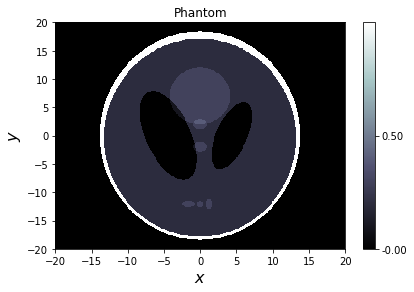

<Figure size 432x288 with 0 Axes>

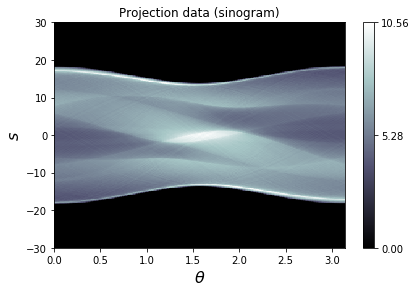

<Figure size 432x288 with 0 Axes>

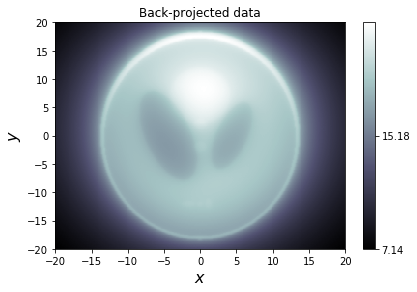

<Figure size 432x288 with 0 Axes>

In [6]:
# Reconstruction space: discretized functions on the rectangle
# [-20, 20]^2 with 300 samples per dimension.
reco_space = odl.uniform_discr(
    min_pt=[-20, -20], max_pt=[20, 20], shape=[300, 300], dtype='float32')

# Make a parallel beam geometry with flat detector
# Angles: uniformly spaced, n = 180, min = 0, max = pi
angle_partition = odl.uniform_partition(0, np.pi, 180)
# Detector: uniformly sampled, n = 512, min = -30, max = 30
detector_partition = odl.uniform_partition(-30, 30, 512)
geometry = odl.tomo.Parallel2dGeometry(angle_partition, detector_partition)

# Ray transform (= forward projection).
ray_trafo = odl.tomo.RayTransform(reco_space, geometry)

# Create a discrete Shepp-Logan phantom (modified version)
phantom = odl.phantom.shepp_logan(reco_space, modified=True)

# Create projection data by calling the ray transform on the phantom
proj_data = ray_trafo(phantom)

# Back-projection can be done by simply calling the adjoint operator on the
# projection data (or any element in the projection space).
backproj = ray_trafo.adjoint(proj_data)

# Shows a slice of the phantom, projections, and reconstruction
phantom.show(title='Phantom')
proj_data.show(title='Projection data (sinogram)')
backproj.show(title='Back-projected data')

#
a=1